##### Import statements

In [2]:
import pandas as pd
from utils import create_words_frequency, generate_word_cloud, create_tfidf, create_bow

##### Load input dataset

In [3]:
df = pd.read_csv(
	"data/input/forbes-news.csv",
	sep=";",
	parse_dates=[ "date"]
)

In [4]:
df.head( 5)

,id,date,title,description
0,content_65f361c1b92b13284673a54e,2024-03-14T21:02:01.835Z,How Tax-Efficient Is Your Retirement Planning ...,"When you think about minimizing taxes, you’re ..."
1,content_65e76b4591c2e55bdba4a172,2024-03-14T20:39:32.491Z,Can We Age Well If We Keep Ignoring Healthy Ag...,"For many, there is a belief that aging well is..."
2,content_65f35013cba7d730418de79e,2024-03-14T20:27:49.438Z,This Week In Credit Card News: Elon Musk’s X M...,What took place this week in the credit card a...
3,content_65f353c02960e95df7fab522,2024-03-14T20:22:30.477Z,Supplementary Review: Build-A-Bear Workshop (B...,Fiscal 2023 Q4 revenues rose 2.9% year-over-ye...
4,content_65f350902960e95df7f878a4,2024-03-14T19:33:52.235Z,3 Bullish Signals Flashing For Red-Hot Retail ...,Retail stock Gap (GPS) has been red-hot in the...


In [5]:
df.describe()

,id,date,title,description
count,89994,89994,89993,89911
unique,89883,84317,88842,88557
top,content_5d922e85c319d3000833eda8,2018-06-20T13:30:00.000Z,Closed Alert,What took place this week in the credit card a...
freq,2,30,108,241


##### Identifying missing date

In [6]:
df[ df[ "date"].isnull()]

,id,date,title,description


##### Drop rows with missing date

In [7]:
df = df.dropna( subset=[ "date"])

##### Identifying duplicate rows

In [8]:
df[ df.duplicated()]

,id,date,title,description
95,content_65d8e493a29fad76c2682753,2024-03-11T12:58:10.356Z,Want To Own A Piece Of A Picasso? Fractional O...,One of the biggest ways that the investment la...
3125,content_654171f35267f72847e70d37,2023-11-03T20:17:20.051Z,How You Can Take Advantage Of Your Employee St...,Discover the key challenges employees face wit...
3285,content_653fb77316a8387acdb8d586,2023-10-31T11:00:00.000Z,How Input Financing Can Help Farmers Better Ma...,Farmers need a reliable option that provides t...
4075,content_651825da9686ad7bdaf8f0ef,2023-09-30T15:07:08.297Z,Bullion Hits The Skids As Investors Dump $900 ...,But experts say there’s reason to be optimisti...
5255,content_64dd97259b428672a5a25e0d,2023-08-17T12:00:00.000Z,State Street Stock Has A 45% Upside To Its Pre...,The stock price has suffered over the last fiv...
...,...,...,...,...
84403,content_5bb1102464aaf93e2ca3d56d,2018-09-30T18:14:00.000Z,Slimming Down Portfolio,"In this environment, the prices on our preferr..."
86463,content_5b79893264aaf93ef039e99e,2018-08-19T17:28:00.000Z,Global Information Security Spending To Exceed...,Worldwide spending on information security is ...
86713,content_5b71e72164aaf942a5e2f448,2018-08-14T05:25:00.000Z,How To Use Web Search Trends In Your Fundament...,Alternative data is a hot topic these days. Fr...
87403,content_5b5e74a164aaf976f615ecdb,2018-07-30T02:46:00.000Z,China Startups Brace For 'Capital Winter' As V...,"As China seeks to contain financial risks, one..."


In [9]:
df = df.drop_duplicates()

##### Identifying missing fields

In [10]:
df[ df.isnull().any( axis=1)]

,id,date,title,description
2523,content_65660072bc8531d6a3d1f315,2023-11-28T14:59:17.257Z,Bad Bunny On His Music Career Inspiring Him To...,NaN
2524,content_6565fe1fbc8531d6a3796d55,2023-11-28T14:43:03.630Z,Bad Bunny | Exclusive Full Forbes Interview,NaN
4003,content_651c51f36411c686bce07cf8,2023-10-03T17:33:31.012Z,Sam Bankman-Fried's Feud Trial Begins Today. H...,NaN
4576,content_6500a13d0f30efe65ed984e2,2023-09-12T17:34:53.000Z,In Pictures: The 25 Best Places To Enjoy Your ...,NaN
5708,content_64c856bb2c878a5a89416dd8,2023-08-01T00:41:02.025Z,patti-export-loop-clipcut-final-2,NaN
...,...,...,...,...
85346,content_5b913f7264aaf93e2ca383ae,2018-09-12T13:29:56.137Z,2018 Best Regarded Companies,NaN
85376,content_5b918d5e64aaf93e2ca38573,2018-09-11T19:04:26.509Z,Inside the Hotel Bel-Air's Presidential Suite,NaN
86051,content_5b589d4d64aaf976f615df1c,2018-08-28T13:39:11.212Z,The Best Retirement Place In Each State,NaN
88201,content_5b3c854f64aaf9287cf3983c,2018-07-11T16:46:48.005Z,Volkswagen T-Roc,NaN


##### Filling missing fields

In [11]:
df = df.fillna( "")

##### Create a unified text of title and description of news *by concatenating them*

In [12]:
df[ "text"] = df[ "title"] + ", " + df[ "description"]

In [13]:
features_tfidf, tfidf_vec = create_tfidf( df, feature_column="text", max_feature_size=5000)

In [14]:
features_tfidf_names = tfidf_vec.get_feature_names_out()

features_tfidf_names

array(['0k', '0m', '1q', ..., 'zoom', 'zuckerberg', 'zynga'], dtype=object)

In [15]:
tfidf_sorted_table = create_words_frequency( features_tfidf, features_tfidf_names)

tfidf_sorted_table.head( 20)

,Top Words,Counts
0,stock,1822.973646
1,market,1395.493732
2,new,1232.350536
3,year,1201.327635
4,stocks,1134.073931
5,tax,990.967300
6,financial,950.089186
7,investors,935.813826
8,bitcoin,894.797236
9,company,865.595217


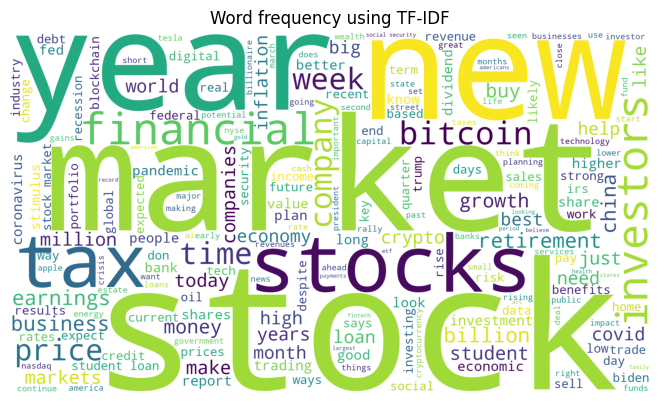

In [16]:
generate_word_cloud( tfidf_sorted_table, "Word frequency using TF-IDF")

In [17]:
features_bow, bow_vec = create_bow( df, feature_column="text", max_feature_size=5000)

In [18]:
features_bow_names = bow_vec.get_feature_names_out()

features_bow_names

array(['0k', '0m', '1q', ..., 'zoom', 'zuckerberg', 'zynga'], dtype=object)

In [19]:
bow_sorted_table = create_words_frequency( features_bow, features_bow_names)

bow_sorted_table.head( 20)

,Top Words,Counts
0,stock,22959
1,market,12808
2,year,11247
3,new,11212
4,stocks,9301
5,tax,8728
6,company,7641
7,financial,7629
8,price,7242
9,investors,7134


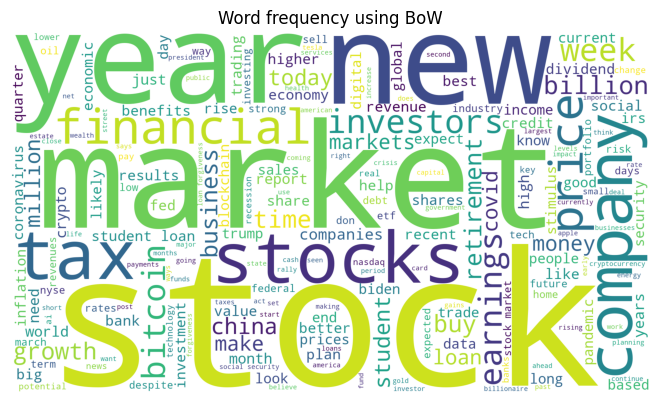

In [20]:
generate_word_cloud( bow_sorted_table, "Word frequency using BoW")

##### Creating new dataframe with clean data

In [21]:
new_df = df[ [ "date", "text"]]

new_df = new_df.sort_values( "date")

new_df.head( 5)

,date,text
89993,2018-01-01T16:34:00.000Z,How Wall Street Got It So Wrong On Stocks Last...
89992,2018-01-01T20:10:00.000Z,"The U.S. Economy in 2018, North Korea And The ..."
89991,2018-01-02T21:55:00.000Z,"Top Apps For Keeping New Year's Resolutions, T..."
89990,2018-01-04T17:45:00.000Z,The American Blogger Making Six-Figures While ...
89989,2018-01-04T20:14:00.000Z,Almost Impossible To Find A Bear On Amazon Sto...


In [22]:
new_df.to_csv( "data/result/forbes-data.csv", sep=";", index=False)